In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

pd.options.display.max_rows = 10

In [2]:
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
    'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
    'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
    'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]}
)
df.head()

,City,Country,Latitude,Longitude
0,Buenos Aires,Argentina,-34.58,-58.66
1,Brasilia,Brazil,-15.78,-47.91
2,Santiago,Chile,-33.45,-70.66
3,Bogota,Colombia,4.60,-74.08
4,Caracas,Venezuela,10.48,-66.86


In [3]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

In [4]:
gdf.head()

,City,Country,Latitude,Longitude,geometry
0,Buenos Aires,Argentina,-34.58,-58.66,POINT (-58.66000 -34.58000)
1,Brasilia,Brazil,-15.78,-47.91,POINT (-47.91000 -15.78000)
2,Santiago,Chile,-33.45,-70.66,POINT (-70.66000 -33.45000)
3,Bogota,Colombia,4.60,-74.08,POINT (-74.08000 4.60000)
4,Caracas,Venezuela,10.48,-66.86,POINT (-66.86000 10.48000)


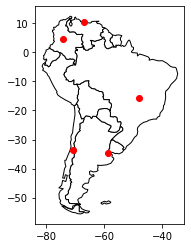

In [7]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

ax = world[world.continent == 'South America'].plot(color='white', edgecolor='black')
gdf.plot(ax=ax, color='red')
plt.show();

In [12]:
countries = gpd.read_file('data/ne_110m_admin_0_countries.shp')

In [13]:
countries.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,Fiji,FJI,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,United Republic of Tanzania,TZA,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,Western Sahara,SAH,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,Canada,CAN,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,United States of America,USA,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


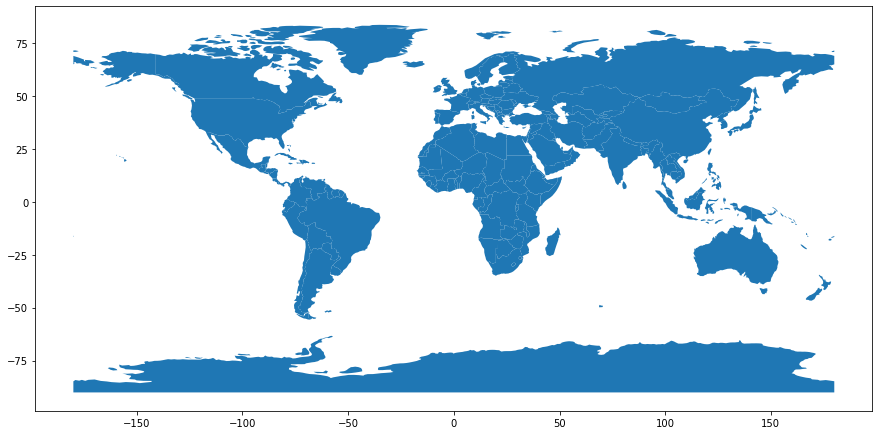

In [14]:
countries.plot(figsize=(15, 10))
plt.show();

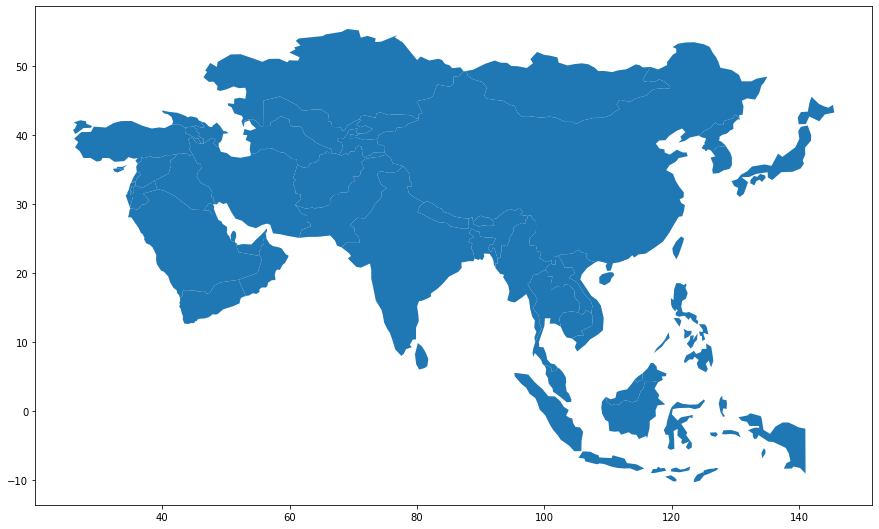

In [15]:
countries[countries['CONTINENT'] == 'Asia'].plot(figsize=(15, 10));

In [16]:
cities = gpd.read_file('zip://data/ne_110m_populated_places.zip')

In [17]:
cities.head()

,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,NAMEASCII,ADM0CAP,CAPIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,8,10,3,Admin-0 capital,Vatican City,None,None,Vatican City,1,None,...,None,None,None,None,None,None,None,None,None,POINT (12.45339 41.90328)
1,7,20,0,Admin-0 capital,San Marino,None,None,San Marino,1,None,...,None,None,None,None,None,None,None,None,None,POINT (12.44177 43.93610)
2,7,20,0,Admin-0 capital,Vaduz,None,None,Vaduz,1,None,...,None,None,None,None,None,None,None,None,None,POINT (9.51667 47.13372)
3,6,30,8,Admin-0 capital alt,Lobamba,None,None,Lobamba,0,Legislative and,...,None,None,None,None,None,None,None,None,None,POINT (31.20000 -26.46667)
4,6,30,8,Admin-0 capital,Luxembourg,None,None,Luxembourg,1,None,...,None,None,None,None,None,None,None,None,None,POINT (6.13000 49.61166)


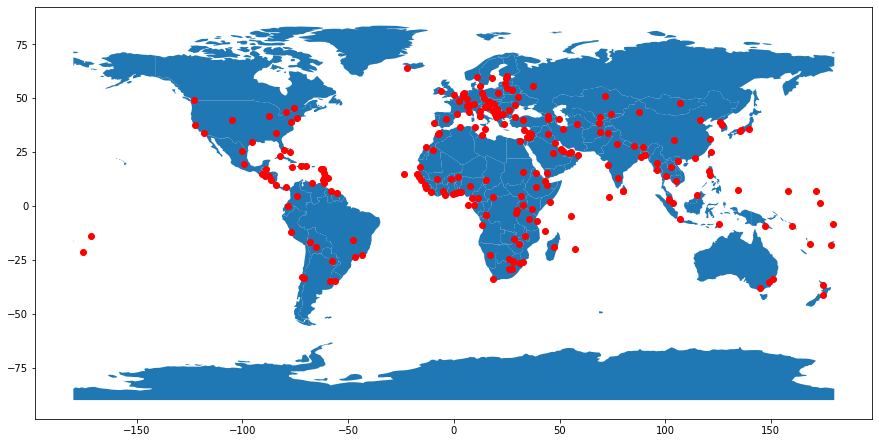

In [18]:
ax = countries.plot(figsize=(15, 10))
cities.plot(ax=ax, color='red')
plt.show();

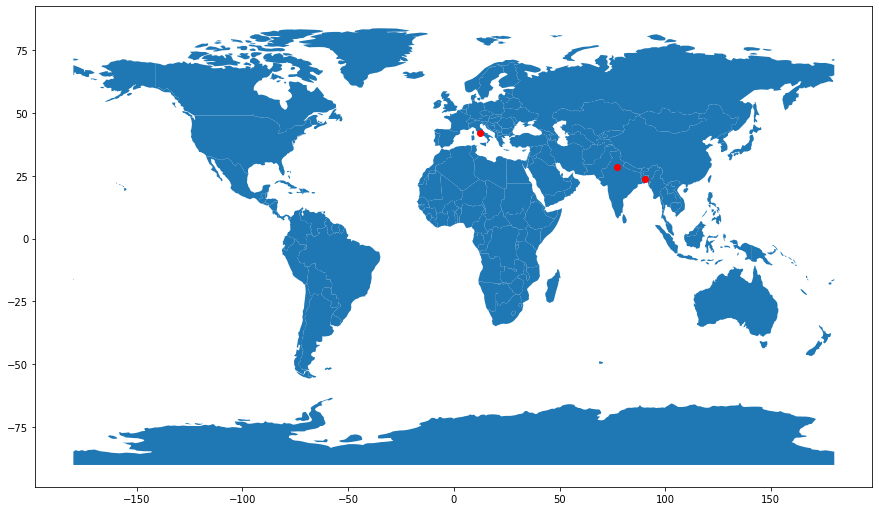

In [21]:
ax = countries.plot(figsize=(15, 10))
cities[cities['NAME'].isin(['Vatican City', 'New Delhi', 'Dhaka'])].plot(ax=ax, color='red')
plt.show();

In [23]:
rivers = gpd.read_file('zip://data/ne_50m_rivers_lake_centerlines.zip')

In [24]:
rivers.head()

,scalerank,featurecla,name,note,min_zoom,name_alt,min_label,name_en,label,wikidataid,...,name_tr,name_vi,name_zh,ne_id,name_fa,name_he,name_uk,name_ur,name_zht,geometry
0,6,Lake Centerline,Kama,None,4.7,None,6.0,Kama,Kama,Q79082,...,Kama,Kama,卡馬河,1159125905,رود کاما,קאמה,Кама,دریائے کاما,卡馬河,"LINESTRING (51.93713 55.70107, 51.88087 55.686..."
1,6,River,Kama,None,4.7,None,6.0,Kama,Kama,Q79082,...,Kama,Kama,卡馬河,1159125917,رود کاما,קאמה,Кама,دریائے کاما,卡馬河,"LINESTRING (53.69385 58.20632, 53.67715 58.273..."
2,3,Lake Centerline,Abay,None,3.0,None,4.0,Lesser Abay,None,Q3501984,...,Abay,Abay,阿拜河,1159125319,ابی,אבאי,Абая,ابے,阿拜,"LINESTRING (37.11301 11.85499, 37.15037 11.893..."
3,3,Lake Centerline,Al Furat,None,3.0,None,4.0,Euphrates,Al Furat,Q34589,...,Fırat,Euphrates,幼发拉底河,1159125935,فرات,פרת,Євфрат,دریائے فرات,幼发拉底河,"LINESTRING (38.56119 35.86264, 38.36534 35.903..."
4,6,Lake Centerline,Alabama,None,5.0,None,6.0,Alabama,Alabama,Q558643,...,Alabama,Alabama,阿拉巴馬河,1159114961,آلاباما,נהר אלבמה,Алабама,البامہ,阿拉巴馬河,"MULTILINESTRING ((-86.52177 33.03212, -86.5209..."


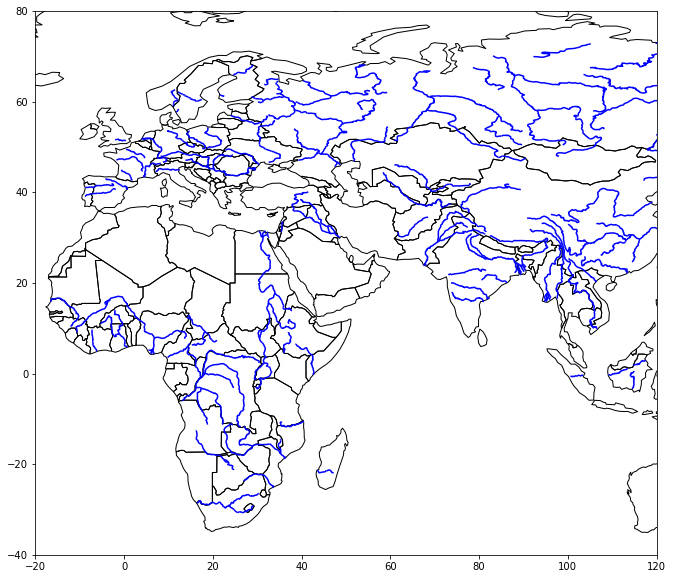

In [25]:
ax = countries.plot(edgecolor='k',
                    facecolor='none',
                    figsize=(15, 10))
rivers.plot(ax=ax, color='blue')
ax.set(xlim=(-20, 120), ylim=(-40, 80))
plt.show();